In [1]:
import os
os.environ['DFT_DIR'] = '/home/moon/autoscience/autoscience/butane/dft'
import pickle
import datetime
import subprocess
import numpy as np

import pandas as pd

import rmgpy.chemkin
import rmgpy.data.kinetics
# import cantera as ct


import sys
sys.path.append('/home/moon/autoscience/autoscience_workflow/workflow/scripts/kinetics')
import kineticfun




import matplotlib.pyplot as plt
%matplotlib inline

species.py:52 <module> INFO Error importing py3Dmol
reaction.py:61 <module> INFO Error importing py3Dmol


In [2]:
def plot_kinetics(rxns, labels=None):
    """Function for plotting reaction kinetics
    Takes in a list of RMG reactions (rmgpy.reaction.Reaction) or a single reaction
    """
    plt.xlabel('1000 / T (K^-1)')
    plt.ylabel('log10(k)')

    if type(rxns) != list:
        rxns = [rxns]
    
    T = np.linspace(300, 3000, 1001)
    for rxn in rxns:
        k = np.zeros(len(T))
        for i in range(0, len(T)):
            k[i] = rxn.get_rate_coefficient(T[i], 101325)
        plt.plot(1000.0 / T, np.log10(k))

    if labels:
        plt.legend(labels)
    plt.show()

In [3]:
# Load the base model
basedir = '/home/moon/autoscience/autoscience/paper/models/pentane24hr/'
base_chemkin = os.path.join(basedir, 'chem_annotated_fixed.inp')
dictionary = os.path.join(basedir, 'species_dictionary.txt')
transport = os.path.join(basedir, 'tran.dat')
base_species_list, base_reaction_list = rmgpy.chemkin.load_chemkin_file(base_chemkin, dictionary_path=dictionary, transport_path=transport)
print(f'{len(base_species_list)} species, {len(base_reaction_list)} reactions')

new_chemkin = os.path.join(basedir, 'refit_model_20230117.inp')
new_species_list, new_reaction_list = rmgpy.chemkin.load_chemkin_file(new_chemkin, dictionary_path=dictionary, transport_path=transport)
print(f'{len(new_species_list)} species, {len(new_reaction_list)} reactions')


2223405438.py:6 <module> INFO Thermo file has default temperature range 300.0 to 1000.0 and 1000.0 to 5000.0
2223405438.py:10 <module> INFO Thermo file has default temperature range 300.0 to 1000.0 and 1000.0 to 5000.0


122 species, 1400 reactions
122 species, 1400 reactions


In [4]:
T = 740.0
P = 100000

In [5]:
# check for different kinetics
def different_kinetics(r1, r2):
    return r1.kinetics.get_rate_coefficient(T, P) != r2.kinetics.get_rate_coefficient(T, P)

In [6]:
def kinetics_difference(r1, r2):
    kdiff = np.abs(r1.kinetics.get_rate_coefficient(T, P) / r2.kinetics.get_rate_coefficient(T, P))
    if kdiff < 1.0:
        kdiff = 1.0 / kdiff
    return kdiff

In [7]:
kdiff = np.zeros(len(base_reaction_list))

count = 0
for i in range(0, len(new_reaction_list)):
    if different_kinetics(base_reaction_list[i], new_reaction_list[i]):
#         print(reaction_list[i])
        kdiff[i] = kinetics_difference(base_reaction_list[i], new_reaction_list[i])
        count += 1
print(f'{count} different reactions')

379 different reactions


In [8]:
# sort by reaction difference
order = np.arange(0, len(base_reaction_list))
kdiff_order = [x for _, x in sorted(zip(kdiff, order))][::-1]


In [9]:
reaction_list[0].family

NameError: name 'reaction_list' is not defined

In [10]:
def print_reaction_smiles(r1):
    smiles_str = ''
    for r in r1.reactants:
        smiles_str += f'{r.smiles} + '
    smiles_str = smiles_str[:-2] + '<=> '
    for r in r1.products:
        smiles_str += f'{r.smiles} + '
    smiles_str = smiles_str[:-2]
    print(smiles_str)

C[C]=O + CC[CH]CC <=> CC=O + CC=CCC 

Base kinetics
Arrhenius(A=(4.2106e+14,'cm^3/(mol*s)'), n=-0.55, Ea=(0,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_Ext-1R!H-R_N-4R->O_N-Sp-5R!H=1R!H_Ext-4CHNS-R_N-6R!H->S_4CHNS->C_N-Sp-6BrBrBrCCCClClClFFFIIINNNOOOPPPSiSiSi#4C_6BrCClFINOPSi->C_N-1R!H-inRing_Ext-4C-R_2R!H->C
Multiplied by reaction path degeneracy 4.0""")
Refit kinetics
Arrhenius(A=(4.47472,'cm^3/(mol*s)'), n=2.938, Ea=(13.002,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_1R!H->C_Ext-4R-R_N-Sp-5R!H#4R_N-5R!H->S_5CO-u0_Ext-1C-R_N-Sp-6R!H=1C_4R->C_Sp-5CCOO=4C""")


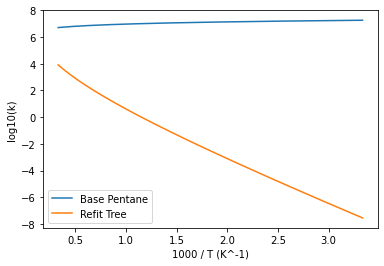

C[C]=O + [CH2]CCCC <=> CC=O + C=CCCC 

Base kinetics
Arrhenius(A=(2.1053e+14,'cm^3/(mol*s)'), n=-0.55, Ea=(0,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_Ext-1R!H-R_N-4R->O_N-Sp-5R!H=1R!H_Ext-4CHNS-R_N-6R!H->S_4CHNS->C_N-Sp-6BrBrBrCCCClClClFFFIIINNNOOOPPPSiSiSi#4C_6BrCClFINOPSi->C_N-1R!H-inRing_Ext-4C-R_2R!H->C
Multiplied by reaction path degeneracy 2.0""")
Refit kinetics
Arrhenius(A=(4.47472,'cm^3/(mol*s)'), n=2.938, Ea=(13.002,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_1R!H->C_Ext-4R-R_N-Sp-5R!H#4R_N-5R!H->S_5CO-u0_Ext-1C-R_N-Sp-6R!H=1C_4R->C_Sp-5CCOO=4C""")


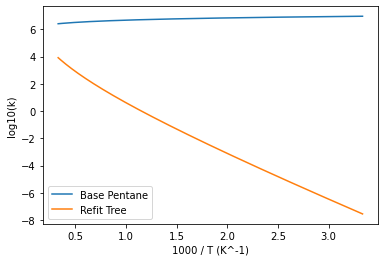

C[C]=O + [CH2]CC <=> CC=O + C=CC 

Base kinetics
Arrhenius(A=(2.1053e+14,'cm^3/(mol*s)'), n=-0.55, Ea=(0,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_Ext-1R!H-R_N-4R->O_N-Sp-5R!H=1R!H_Ext-4CHNS-R_N-6R!H->S_4CHNS->C_N-Sp-6BrBrBrCCCClClClFFFIIINNNOOOPPPSiSiSi#4C_6BrCClFINOPSi->C_N-1R!H-inRing_Ext-4C-R_2R!H->C
Multiplied by reaction path degeneracy 2.0""")
Refit kinetics
Arrhenius(A=(4.47472,'cm^3/(mol*s)'), n=2.938, Ea=(13.002,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_1R!H->C_Ext-4R-R_N-Sp-5R!H#4R_N-5R!H->S_5CO-u0_Ext-1C-R_N-Sp-6R!H=1C_4R->C_Sp-5CCOO=4C""")


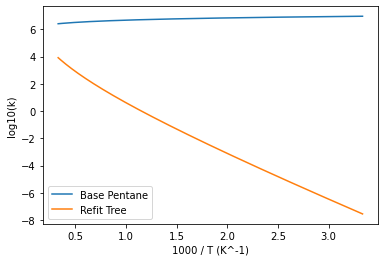

C[C]=O + C[CH]CCC <=> CC=O + CC=CCC 

Base kinetics
Arrhenius(A=(2.1053e+14,'cm^3/(mol*s)'), n=-0.55, Ea=(0,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_Ext-1R!H-R_N-4R->O_N-Sp-5R!H=1R!H_Ext-4CHNS-R_N-6R!H->S_4CHNS->C_N-Sp-6BrBrBrCCCClClClFFFIIINNNOOOPPPSiSiSi#4C_6BrCClFINOPSi->C_N-1R!H-inRing_Ext-4C-R_2R!H->C
Multiplied by reaction path degeneracy 2.0""")
Refit kinetics
Arrhenius(A=(4.47472,'cm^3/(mol*s)'), n=2.938, Ea=(13.002,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_1R!H->C_Ext-4R-R_N-Sp-5R!H#4R_N-5R!H->S_5CO-u0_Ext-1C-R_N-Sp-6R!H=1C_4R->C_Sp-5CCOO=4C""")


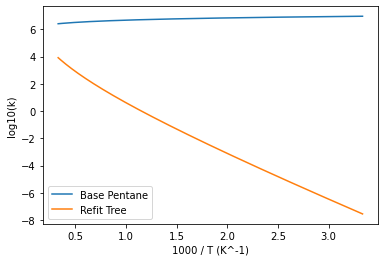

[CH]=C + CC[CH]CC <=> C=C + CC=CCC 

Base kinetics
Arrhenius(A=(4.84e+12,'cm^3/(mol*s)'), n=0, Ea=(0,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_Ext-1R!H-R_N-4R->O_N-Sp-5R!H=1R!H_Ext-4CHNS-R_N-6R!H->S_4CHNS->C_N-Sp-6BrBrBrCCCClClClFFFIIINNNOOOPPPSiSiSi#4C_6BrCClFINOPSi->C_N-1R!H-inRing_N-Sp-6C-4C
Multiplied by reaction path degeneracy 4.0""")
Refit kinetics
Arrhenius(A=(4.47472,'cm^3/(mol*s)'), n=2.938, Ea=(13.002,'kcal/mol'), T0=(1,'K'), comment="""Estimated from node Root_1R!H->C_Ext-4R-R_N-Sp-5R!H#4R_N-5R!H->S_5CO-u0_Ext-1C-R_N-Sp-6R!H=1C_4R->C_Sp-5CCOO=4C""")


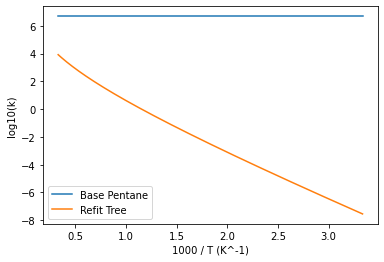

In [11]:
for i in range(0, 5):
    rmg_index = kdiff_order[i]
#     print(base_reaction_list[rmg_index])

    
    print_reaction_smiles(base_reaction_list[rmg_index])
    print()
    print('Base kinetics')
    print(base_reaction_list[rmg_index].kinetics)
    print('Refit kinetics')
    print(new_reaction_list[rmg_index].kinetics)
    plot_kinetics([base_reaction_list[rmg_index], new_reaction_list[rmg_index]], labels=['Base Pentane', 'Refit Tree'])

In [ ]:
# get the list of species and reactions to add to https://github.com/comocheng/autoscience/blob/main/butane/dft/species_list.csv





In [12]:
# lookup the reaction indices in the csv
DFT_DIR = '/home/moon/autoscience/autoscience/butane/dft'

reaction_csv = os.path.join(DFT_DIR, 'reaction_list.csv')
reaction_df = pd.read_csv(reaction_csv)

if 'Unnamed: 0' in reaction_df.keys():
    reaction_df = reaction_df.drop(columns=['Unnamed: 0'])

In [13]:
def sort_reaction_smiles(reaction_smiles):
    # sort the reactants and products in the reaction smiles

    # handle charged species

    reaction_smiles = reaction_smiles.replace('[C-]#[O+]', 'carbonmonoxide')
    reaction_smiles = reaction_smiles.replace('[O-][N+]#C', 'formonitrileoxide')
    reaction_smiles = reaction_smiles.replace('[O-][N+]=C', 'methylenenitroxide')

    reactants, products = reaction_smiles.split('_')
    reactants = reactants.split('+')
    products = products.split('+')
    reactants.sort()
    products.sort()
    reactants = '+'.join(reactants)
    products = '+'.join(products)
    reaction_smiles = reactants + '_' + products

    reaction_smiles = reaction_smiles.replace('carbonmonoxide', '[C-]#[O+]')
    reaction_smiles = reaction_smiles.replace('formonitrileoxide', '[O-][N+]#C')
    reaction_smiles = reaction_smiles.replace('methylenenitroxide', '[O-][N+]=C')

    return reaction_smiles

In [15]:
# print a reaction's number in the database
for i in range(0, 20):
    rmg_index = kdiff_order[i]
    reaction_smiles = kineticfun.reaction2smiles(base_reaction_list[rmg_index])
    db_index = kineticfun.reaction_smiles2index(reaction_smiles)
    print(rmg_index, base_reaction_list[rmg_index], db_index)


377 CH3CO(20) + C5H11-3(422) <=> CH3CHO(35) + C5H10-2(424) 2665
825 CH3CO(20) + C5H11-1(420) <=> CH3CHO(35) + C5H10-1(423) 2831
482 CH3CO(20) + NC3H7(92) <=> CH3CHO(35) + C3H6(12) 437
375 CH3CO(20) + C5H11-2(421) <=> CH3CHO(35) + C5H10-2(424) 2663
478 C2H3(22) + C5H11-3(422) <=> C2H4(11) + C5H10-2(424) 2701
1385 CH3CO(20) + C3H5O(129) <=> CH3CHO(35) + C2H3CHO(74) 1230
773 CH3CO(20) + C2H5O(49) <=> CH3CHO(35) + CH3CHO(35) 970
1381 C2H3(22) + C3H5O(129) <=> C2H4(11) + C2H3CHO(74) 1221
770 C2H3(22) + C2H5O(49) <=> C2H4(11) + CH3CHO(35) 965
817 C2H3(22) + C5H11-1(420) <=> C2H4(11) + C5H10-1(423) 2823
477 C2H3(22) + C5H11-2(421) <=> C2H4(11) + C5H10-2(424) 2700
267 C2H3(22) + NC3H7(92) <=> C2H4(11) + C3H6(12) 391
474 HCO(19) + C5H11-3(422) <=> CH2O(9) + C5H10-2(424) 2697
1379 HCO(19) + C3H5O(129) <=> CH2O(9) + C2H3CHO(74) 1219
813 HCO(19) + C5H11-1(420) <=> CH2O(9) + C5H10-1(423) 2819
768 HCO(19) + C2H5O(49) <=> CH2O(9) + CH3CHO(35) 964
473 HCO(19) + C5H11-2(421) <=> CH2O(9) + C5H10-2(424) 

In [18]:
sys.path.append('/home/moon/autoscience/autoscience_workflow/workflow/scripts/thermo')
import job

# print all of the species involved
for i in range(0, 40):
    rmg_index = kdiff_order[i]
    for sp in base_reaction_list[rmg_index].reactants + base_reaction_list[rmg_index].products:
        db_index = job.smiles2index(sp.smiles)
        print(db_index)
    print()

23
193
33
195

23
191
33
194

23
48
33
15

23
192
33
195

25
193
14
195

23
54
33
47

23
40
33
33

25
54
14
47

25
40
14
33

25
191
14
194

25
192
14
195

25
48
14
15

22
193
12
195

22
54
12
47

22
191
12
194

22
40
12
33

22
192
12
195

22
48
12
15

192
193
195
179

190
193
37
195

193
193
195
179

50
193
15
195

63
193
61
195

190
191
37
194

190
192
37
195

190
48
37
15

34
30
12
35

50
81
15
63

30
242
12
245

30
45
12
46

30
38
12
39

50
48
15
15

63
191
61
194

48
63
15
61

191
193
194
179

192
192
195
179

48
192
15
179

48
193
15
179

63
193
62
195

87
193
46
195



In [ ]:
reaction_df